## **Siddhant Sehgal**

# **Task 3-Perform ‘Exploratory Data Analysis’ on dataset ‘SampleSuperstore'**

# Importing libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go

# Importing Dataset

In [2]:
dataset=pd.read_csv('SampleSuperstore.csv')
dataset

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9989,Second Class,Consumer,United States,Miami,Florida,33180,South,Furniture,Furnishings,25.2480,3,0.20,4.1028
9990,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Furniture,Furnishings,91.9600,2,0.00,15.6332
9991,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Technology,Phones,258.5760,2,0.20,19.3932
9992,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Office Supplies,Paper,29.6000,4,0.00,13.3200


# Expolatory Data Analysis

In [3]:
fig=px.bar(dataset,x="Ship Mode",title="Most Common Ship Mode")
fig.show()

As we can see from above graph that most prefered ship mode is Standard Class

In [4]:
seg=dataset['Segment'].value_counts()
seg

Consumer       5191
Corporate      3020
Home Office    1783
Name: Segment, dtype: int64

In [5]:
fig=px.pie(values=seg.values,names=seg.index)
fig.show()

Most Orders are Placed by Consumers

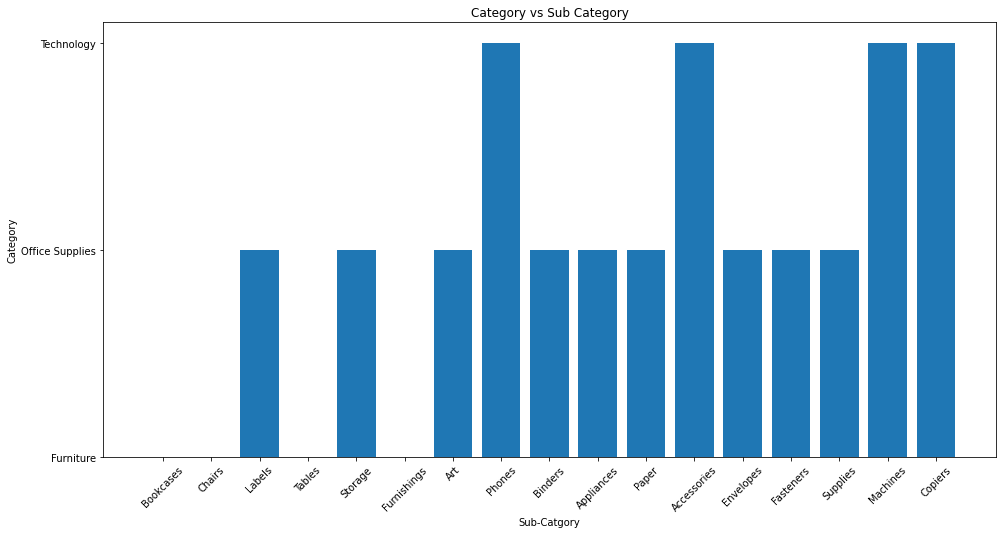

In [6]:
plt.figure(figsize=(16,8))
plt.bar('Sub-Category','Category', data=dataset)
plt.title('Category vs Sub Category')
plt.xlabel('Sub-Catgory')
plt.ylabel('Category')
plt.xticks(rotation=45)
plt.show()

Category Vs SubCategories

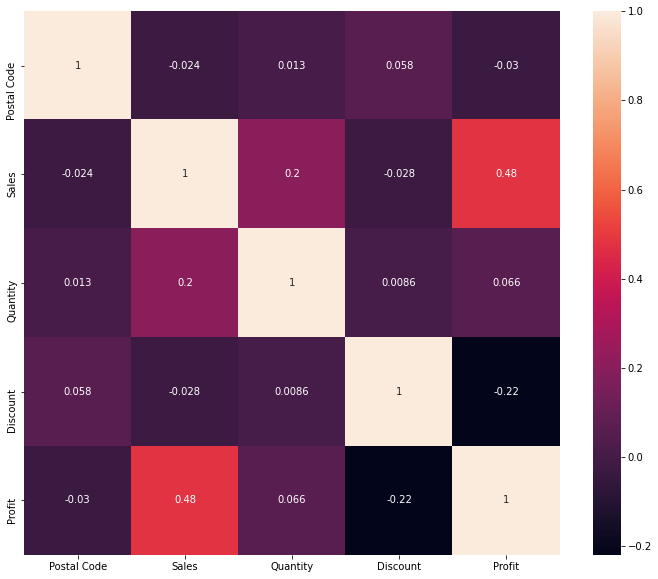

In [9]:
plt.figure(figsize=(12,10))
sns.heatmap(dataset.corr(),annot=True)

In [12]:
#!pip install plotly==4.5.2 

     |████████████████████████████████| 7.1MB 4.0MB/s 
  Found existing installation: plotly 4.4.1
    Uninstalling plotly-4.4.1:
      Successfully uninstalled plotly-4.4.1


In [10]:
px.sunburst(dataset,path=['Category','Sub-Category'],values='Sales')

Most of the sales is done in Technology Department

Graph Insights:-

1.   If u click on Technology on above graphs you can see that most of the sales in technology is of Mobile Phones
2.   If u click on Furniture on above graphs you can see that most of the sales in technology is of Tables and Chairs
3. If u click on Office Supplies on above graphs you can see that most of the sales in technology is of Storage and Binders



In [17]:
px.sunburst(dataset,path=['Region'],values='Profit')

Most Profits are earned in West Region 

In [20]:
state_count=dataset['State'].value_counts()[:15]

In [21]:
px.bar(x=state_count.index,y=state_count.values,color=state_count.values)

Top 15 States occuring Frequently

In [24]:
sm=dataset['Ship Mode'].value_counts()
sm

Standard Class    5968
Second Class      1945
First Class       1538
Same Day           543
Name: Ship Mode, dtype: int64

In [34]:
fig=px.bar(dataset,x='Ship Mode',color='Category',hover_name='Region')
fig.show()

<function matplotlib.pyplot.show>

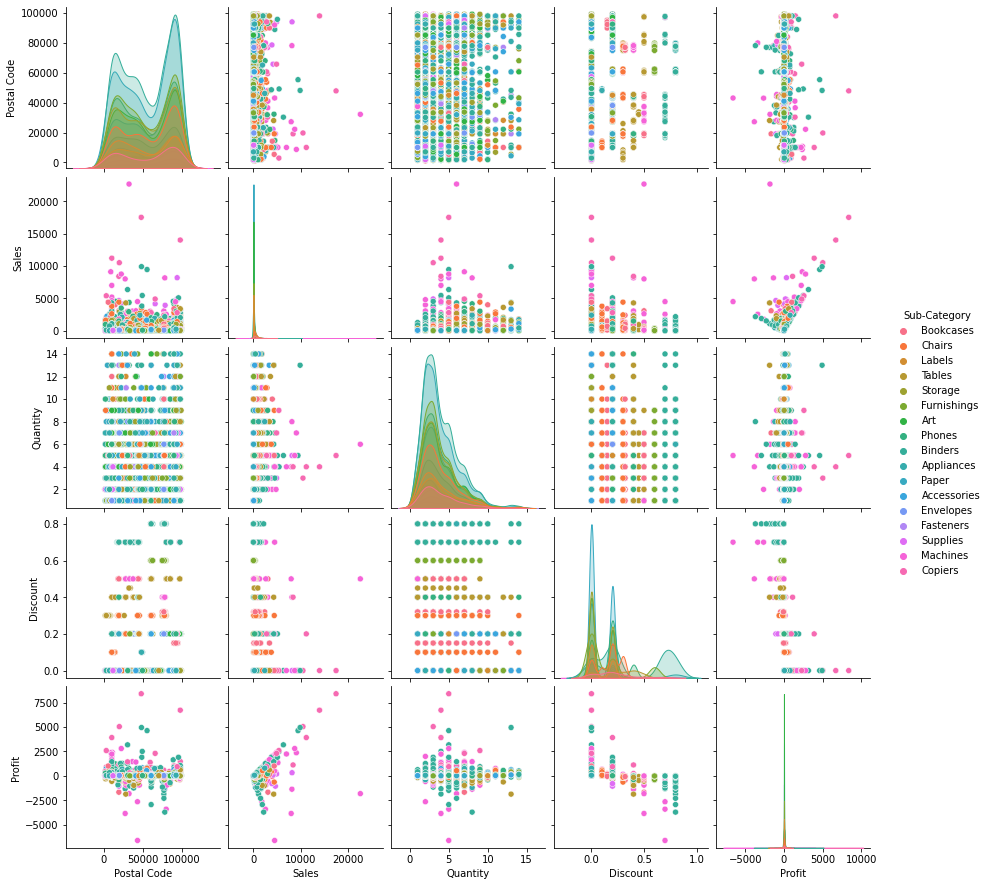

In [37]:
figsize=(15,10)
sns.pairplot(dataset,hue='Sub-Category')
plt.show

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



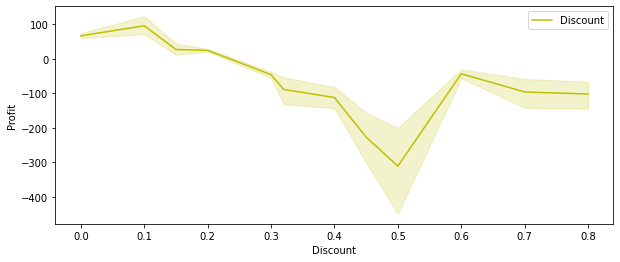

In [42]:
plt.figure(figsize=(10,4))
sns.lineplot('Discount','Profit', data=dataset , color='y',label='Discount')
plt.legend()
plt.show()

let us have a look at the total sales per state and the revenue generated.

In [53]:
state_code = {'Alabama': 'AL','Alaska': 'AK','Arizona': 'AZ','Arkansas': 'AR','California': 'CA',
              'Colorado': 'CO','Connecticut': 'CT','Delaware': 'DE','Florida': 'FL','Georgia': 'GA',
              'Hawaii': 'HI','Idaho': 'ID','Illinois': 'IL','Indiana': 'IN','Iowa': 'IA','Kansas': 'KS',
              'Kentucky': 'KY','Louisiana': 'LA','Maine': 'ME','Maryland': 'MD','Massachusetts': 'MA',
              'Michigan': 'MI','Minnesota': 'MN','Mississippi': 'MS','Missouri': 'MO','Montana': 'MT',
              'Nebraska': 'NE','Nevada': 'NV','New Hampshire': 'NH','New Jersey': 'NJ','New Mexico': 'NM',
              'New York': 'NY','North Carolina': 'NC','North Dakota': 'ND','Ohio': 'OH','Oklahoma': 'OK',
              'Oregon': 'OR','Pennsylvania': 'PA','Rhode Island': 'RI','South Carolina': 'SC',
              'South Dakota': 'SD','Tennessee': 'TN','Texas': 'TX','Utah': 'UT','Vermont': 'VT',
              'Virginia': 'VA','District of Columbia': 'WA','Washington': 'WA','West Virginia': 'WV',
              'Wisconsin': 'WI','Wyoming': 'WY'}
dataset['state_code'] = dataset.State.apply(lambda x: state_code[x])

In [54]:
state_data = dataset[['Sales', 'Profit', 'state_code']].groupby(['state_code']).sum()


fig = go.Figure(data=go.Choropleth(
    locations=state_data.index, 
    z = state_data.Sales, 
    locationmode = 'USA-states', 
    colorscale = 'Reds',
    colorbar_title = 'Sales in USD',
))

fig.update_layout(
    title_text = 'Total State-Wise Sales',
    geo_scope='usa',
    height=800,
)

fig.show()

In [55]:
fig = go.Figure(data=go.Choropleth(
    locations=state_data.index, # Spatial coordinates
    z = state_data.Profit, # Data to be color-coded
    locationmode = 'USA-states', # set of locations match entries in `locations`
    colorscale = [[0, 'rgb(255,0,0)'], [0.25, 'rgb(255,255,255)'], [0.45, 'rgb(124,208,247)'], [0.6, 'rgb(97,255,140)'], [1, 'rgb(8,181,0)']],
#     reversescale = True,
    colorbar_title = 'Profits in USD',
))

fig.update_layout(
    title_text = 'Total State-Wise Profit/Loss',
    geo_scope='usa', # limite map scope to USA
    height=800,
)

fig.show()

From this we can understand:

In "Central" Region the profit and sales are less

Labels, Art, Paper, Fastners are sold less than the other products.

First class products are sold more than Second class, Standard class and Same day. So we should give discount more to other classes to increase the profit.

The Discount should not be more than 4% . When the Discount goes beyond 4 % the profit decreases . So we should try to keep the discount atmost 4 %.

Consumers gives less profit than other segment.